[Reference](https://blog.gopenai.com/from-chaos-to-efficiency-solving-delivery-route-problems-with-genetic-algorithms-37d43311c14f)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Configuration constants
NUM_CITIES = 20
POPULATION_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.02
TOURNAMENT_SIZE = 5
VEHICLE_CAPACITY = 200


# Generate random cities and demands
np.random.seed(42)
CITIES = np.random.rand(NUM_CITIES, 2) * 100
DEMANDS = np.random.randint(5, 15, size=NUM_CITIES)

Calculates the total distance of a delivery route, including the return trip.

In [3]:
def total_distance(route):
    dist = 0
    for i in range(len(route) - 1):
        city_a = CITIES[route[i]]
        city_b = CITIES[route[i + 1]]
        dist += np.linalg.norm(city_a - city_b)
    dist += np.linalg.norm(CITIES[route[-1]] - CITIES[route[0]])
    return dist

Checks if a route's total demand does not exceed vehicle capacity.

In [4]:
def is_valid_route(route):
    load = 0
    for city in route:
        load += DEMANDS[city]
        if load > VEHICLE_CAPACITY:
            return False
    return True

Generates an initial population of valid random routes.

In [5]:
def create_initial_population(pop_size, max_attempts=1000):
    population = []
    attempts = 0
    while len(population) < pop_size and attempts < max_attempts:
        route = list(range(NUM_CITIES))
        random.shuffle(route)
        if is_valid_route(route):
            population.append(route)
        attempts += 1
    if not population:
        print("❌ Failed to generate any valid route.")
        print(f"💡 Total demand across all cities: {np.sum(DEMANDS)}")
        print(f"🚚 Vehicle capacity: {VEHICLE_CAPACITY}")
        print(f"🔢 Demands: {DEMANDS}")
        raise ValueError("Failed to generate a valid initial population.")
    return population

Fitness is the inverse of distance (shorter is better).

In [6]:
def evaluate_fitness(population):
    return [1 / total_distance(route) if is_valid_route(route) else 0 for route in population]

Selects the best individual from a randomly chosen subset.

In [7]:
def selection(population, fitness, k=TOURNAMENT_SIZE):
    selected = random.choices(list(zip(population, fitness)), k=k)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0]

Creates a child route by combining parts of both parents.

In [8]:
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child = [None] * NUM_CITIES
    child[start:end+1] = parent1[start:end+1]
    fill_values = [city for city in parent2 if city not in child]
    fill_index = 0
    for i in range(NUM_CITIES):
        if child[i] is None:
            child[i] = fill_values[fill_index]
            fill_index += 1
    return child

Swaps two cities randomly based on a mutation rate.

In [9]:
def mutate(route, mutation_rate=MUTATION_RATE):
    for i in range(NUM_CITIES):
        if random.random() < mutation_rate:
            j = random.randint(0, NUM_CITIES - 1)
            route[i], route[j] = route[j], route[i]
    return route

Plots the best route on a 2D map.

In [10]:
def plot_route(route, title="Optimized Delivery Route"):
    path = CITIES[route + [route[0]]]
    plt.figure(figsize=(8, 6))
    plt.plot(path[:, 0], path[:, 1], 'o-', label='Route')
    for idx, point in enumerate(path):
        plt.text(point[0]+0.5, point[1]+0.5, str(route[idx % NUM_CITIES]), fontsize=8)
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()

The core GA logic: evolve population through generations.

In [11]:
def genetic_algorithm():
    population = create_initial_population(POPULATION_SIZE)
    best_route = None
    best_distance = float('inf')
    best_distances = []

    for gen in range(GENERATIONS):
        fitness = evaluate_fitness(population)
        new_population = []

        while len(new_population) < POPULATION_SIZE:
            parent1 = selection(population, fitness)
            parent2 = selection(population, fitness)
            child = crossover(parent1, parent2)
            child = mutate(child)
            if is_valid_route(child):
                new_population.append(child)

        population = new_population

        if population:
            current_best = min(population, key=total_distance)
            current_dist = total_distance(current_best)
            best_distances.append(current_dist)
            if current_dist < best_distance:
                best_distance = current_dist
                best_route = current_best

            if gen % 50 == 0:
                print(f"Generation {gen}: Best Distance = {best_distance:.2f}")

    return best_route, best_distance, best_distances

In [12]:
if __name__ == "__main__":
    best_route, best_dist, best_distances = genetic_algorithm()
    print(f"\n🌝 Final Best Route Distance: {best_dist:.2f}")
    print("🚚 Optimized Route:", best_route)

Generation 0: Best Distance = 829.74
Generation 50: Best Distance = 462.31
Generation 100: Best Distance = 462.31
Generation 150: Best Distance = 462.31
Generation 200: Best Distance = 462.31
Generation 250: Best Distance = 462.31
Generation 300: Best Distance = 462.31
Generation 350: Best Distance = 462.31
Generation 400: Best Distance = 443.70
Generation 450: Best Distance = 443.70

🌝 Final Best Route Distance: 443.70
🚚 Optimized Route: [4, 12, 0, 16, 5, 3, 13, 8, 11, 7, 2, 18, 9, 1, 17, 6, 14, 10, 15, 19]


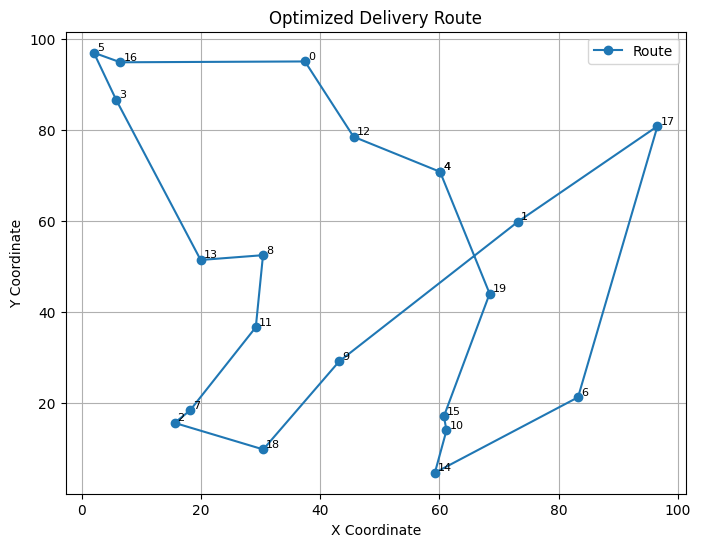

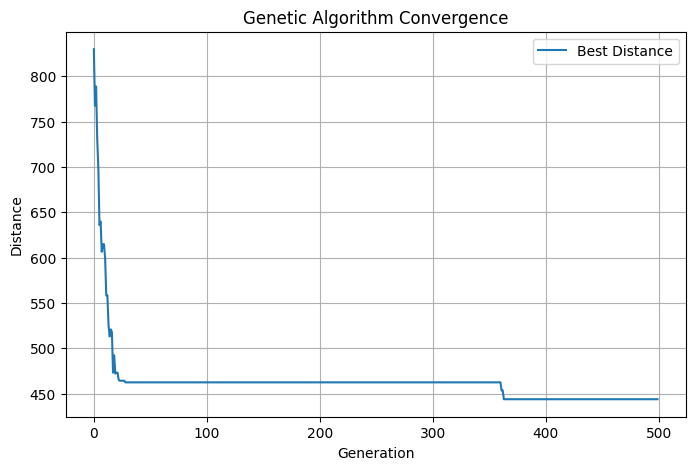

In [13]:
if best_route:
    plot_route(best_route)
plt.figure(figsize=(8, 5))
plt.plot(best_distances, label='Best Distance')
plt.xlabel("Generation")
plt.ylabel("Distance")
plt.title("Genetic Algorithm Convergence")
plt.legend()
plt.grid(True)
plt.show()